In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df=pd.read_csv(("data/dataset.csv"))

In [163]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [164]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [165]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [166]:
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [167]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [168]:
df.shape

(43400, 12)

In [169]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [170]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [171]:
df.duplicated().sum()

0

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [173]:
print(df.stroke.value_counts())

stroke
0    42617
1      783
Name: count, dtype: int64


#Check Missing Values

In [175]:
missing_values=df.isnull().sum()
print(missing_values)

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


#Handling Missing Values

In [177]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None
# replace missing values in variable 'bmi' with its mean
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
# remove (drop) data associated with missing values in variable 'smoking_status
clean_data=df.dropna(subset=['smoking_status'])
# drop variable 'id'
clean_data=clean_data.drop(columns=['id'])
# validate there's no more missing values
print(clean_data.isnull().sum())
print('Missing values in variable \'bmi\'\t\t:',clean_data['bmi'].isnull().sum())
print('Missing values in variable \'smoking_status\':',clean_data['smoking_status'].isnull().sum())
print("Shape of data without missing values: {}".format(clean_data.shape))



gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Missing values in variable 'bmi'		: 0
Missing values in variable 'smoking_status': 0
Shape of data without missing values: (30108, 11)


C:\Users\Nazm\AppData\Local\Temp\ipykernel_9964\44137288.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(),inplace=True)


In [178]:
# Save cleaned data
clean_data.to_csv('data/clean_data.csv',index=False)

In [179]:
features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in features:
    values = clean_data[col].unique()
    print(f"Distinct entries found in '{col}' column → {values}")

Distinct entries found in 'gender' column → ['Male' 'Female' 'Other']
Distinct entries found in 'ever_married' column → ['Yes' 'No']
Distinct entries found in 'work_type' column → ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Distinct entries found in 'Residence_type' column → ['Urban' 'Rural']
Distinct entries found in 'smoking_status' column → ['never smoked' 'formerly smoked' 'smokes']


In [180]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(data_frame):
    enc_gender = LabelEncoder()
    enc_married = LabelEncoder()
    enc_work = LabelEncoder()
    enc_residence = LabelEncoder()
    enc_smoke = LabelEncoder()

    data_frame['gender'] = enc_gender.fit_transform(data_frame['gender'])
    data_frame['ever_married'] = enc_married.fit_transform(data_frame['ever_married'])
    data_frame['work_type'] = enc_work.fit_transform(data_frame['work_type'])
    data_frame['Residence_type'] = enc_residence.fit_transform(data_frame['Residence_type'])
    data_frame['smoking_status'] = enc_smoke.fit_transform(data_frame['smoking_status'])
    
    return data_frame

clean_data = apply_label_encoding(clean_data)
clean_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [181]:
# Save encoded cleaned data
clean_data.to_csv('data/clean_data_encoded.csv',index=False)

Class-wise count of stroke outcomes:
 stroke
0    29470
1      638
Name: count, dtype: int64


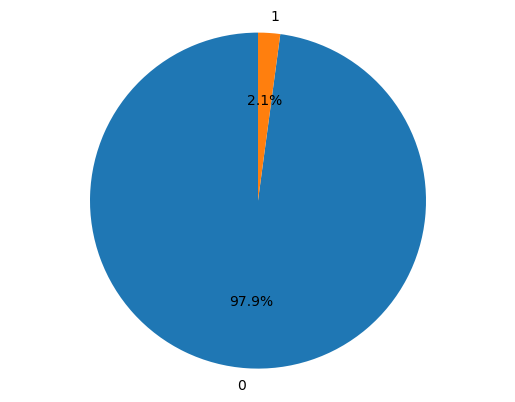

In [182]:
distribution = clean_data['stroke'].value_counts()
print("Class-wise count of stroke outcomes:\n", distribution)

fig, ax = plt.subplots()
ax.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()


In [183]:
X = clean_data.drop('stroke', axis=1)
y = clean_data['stroke']
print(y.value_counts())
print(X.shape)
print(y.shape)

stroke
0    29470
1      638
Name: count, dtype: int64
(30108, 10)
(30108,)


In [184]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

def prepare_data_splits(X, target, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, stratify=target)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X = clean_data.drop('stroke', axis=1)
y = clean_data['stroke']

X_train, X_valid, X_test, y_train, y_valid, y_test = prepare_data_splits(X, y, test_size=0.2, random_state=42)

synth_balancer = ADASYN(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = synth_balancer.fit_resample(X_train, y_train)

_, train_counts = np.unique(y_train_resampled, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

print("Balanced Training Set Distribution →", train_counts)
print("Validation Set Distribution →", valid_counts)
print("Testing Set Distribution →", test_counts)


Balanced Training Set Distribution → [18860 18912]
Validation Set Distribution → [4716  102]
Testing Set Distribution → [5894  128]


In [185]:
    from imblearn.over_sampling import ADASYN
    # create the  object with the desired sampling strategy.
    adasyn=ADASYN(random_state=42,sampling_strategy='minority')
    # fit the object to our training data
    X_resampled,y_resampled=adasyn.fit_resample(clean_data.drop('stroke',axis=1),clean_data['stroke'])
    print(y_resampled.value_counts())
    print(X_resampled.shape)
    print(y_resampled.shape)

stroke
1    29512
0    29470
Name: count, dtype: int64
(58982, 10)
(58982,)


(-1.0999999999990544,
 1.0999999999945465,
 -1.0999999999945473,
 1.0999999999997403)

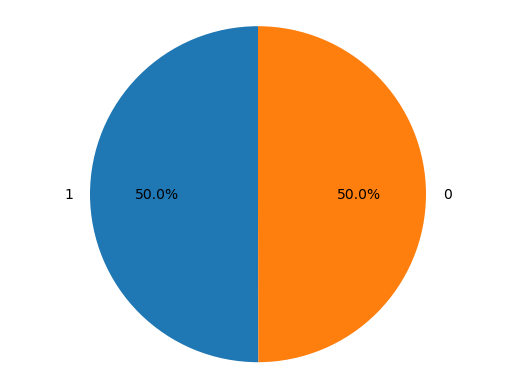

In [186]:
_class_distribution=y_resampled.value_counts()
fig,ax=plt.subplots()
ax.pie(_class_distribution,labels=_class_distribution.index,autopct='%1.1f%%',startangle=90)
ax.axis('equal')

In [187]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
X_train_resampled = standardizer.fit_transform(X_train_resampled)
X_valid = standardizer.transform(X_valid)
X_test = standardizer.transform(X_test)


#### Random Forest (RF)

Performance Summary (Random Forest on test data):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5894
           1       0.03      0.05      0.04       128

    accuracy                           0.94      6022
   macro avg       0.50      0.51      0.50      6022
weighted avg       0.96      0.94      0.95      6022

Random Forest Confusion Matrix Output:
[[5671  223]
 [ 121    7]]


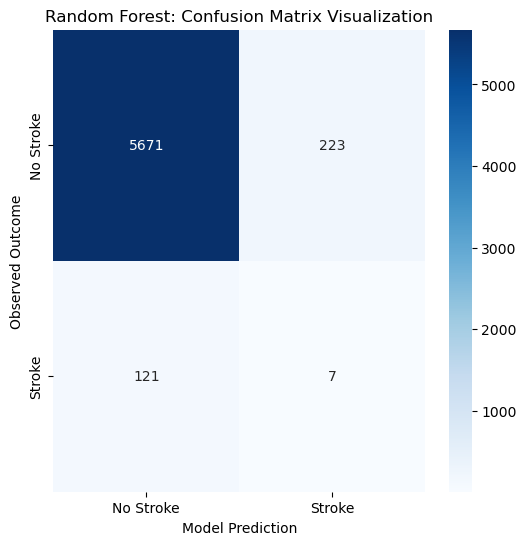

Test Accuracy → 0.94
Precision Score → 0.03
Recall Score → 0.05
F1 Score → 0.04
Sensitivity → 0.05
Specificity → 0.96
AUC Score → 0.72


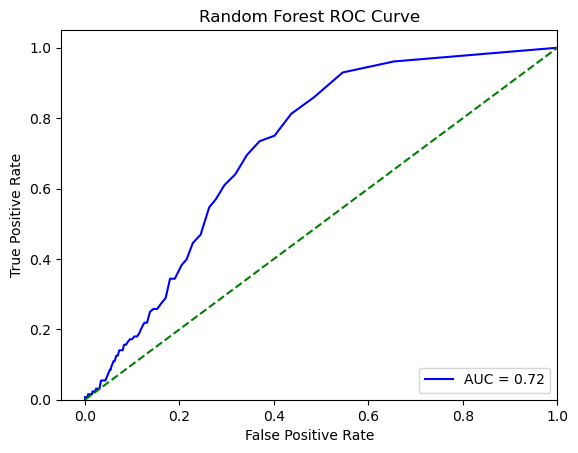

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

def get_sensitivity_specificity(actual, predicted):
    conf_matrix = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = conf_matrix.ravel()
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    return sens, spec

# Initialize and train the model
random_forest = RandomForestClassifier(
    random_state=42
)
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict test set outcomes
predicted_rf = random_forest.predict(X_test)
predicted_rf_proba = random_forest.predict_proba(X_test)

print("Performance Summary (Random Forest on test data):")
print(classification_report(y_test, predicted_rf))

print("Random Forest Confusion Matrix Output:")
print(confusion_matrix(y_test, predicted_rf))

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, predicted_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Random Forest: Confusion Matrix Visualization')
plt.ylabel('Observed Outcome')
plt.xlabel('Model Prediction')
plt.show()

# Core evaluation metrics
acc_rf = accuracy_score(y_test, predicted_rf)
print(f"Test Accuracy → {acc_rf:.2f}")

rf_precision = precision_score(y_test, predicted_rf)
rf_recall = recall_score(y_test, predicted_rf)
rf_f1 = f1_score(y_test, predicted_rf)
print(f"Precision Score → {rf_precision:.2f}")
print(f"Recall Score → {rf_recall:.2f}")
print(f"F1 Score → {rf_f1:.2f}")

# Sensitivity, Specificity, AUC
sensitivity_rf, specificity_rf = get_sensitivity_specificity(y_test, predicted_rf)
false_pos_rate, true_pos_rate, _ = roc_curve(y_test, predicted_rf_proba[:, 1])
rf_auc = roc_auc_score(y_test, predicted_rf_proba[:, 1])

print(f"Sensitivity → {sensitivity_rf:.2f}")
print(f"Specificity → {specificity_rf:.2f}")
print(f"AUC Score → {rf_auc:.2f}")

# ROC Curve
plt.figure()
plt.plot(false_pos_rate, true_pos_rate, color='blue', label=f'AUC = {rf_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


### XGBoost (XGB)

C:\Users\Nazm\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation metrics for the XGBoost classifier:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5894
           1       0.04      0.09      0.06       128

    accuracy                           0.94      6022
   macro avg       0.51      0.52      0.51      6022
weighted avg       0.96      0.94      0.95      6022

Confusion matrix (actual vs predicted):
[[5624  270]
 [ 116   12]]


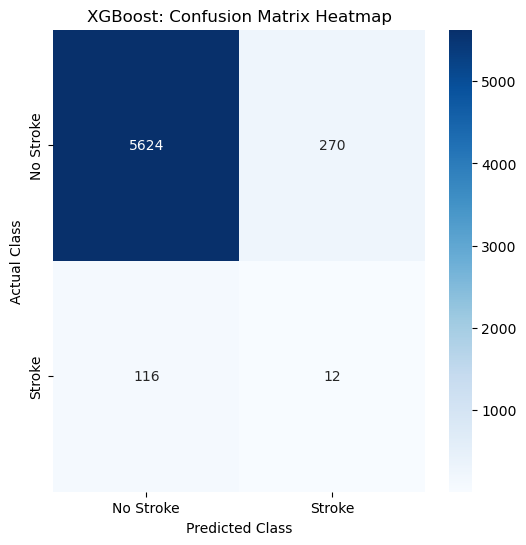

Accuracy Score → 0.94
Precision → 0.04
Recall → 0.09
F1 Score → 0.06
Sensitivity → 0.09
Specificity → 0.95
AUC Score → 0.71


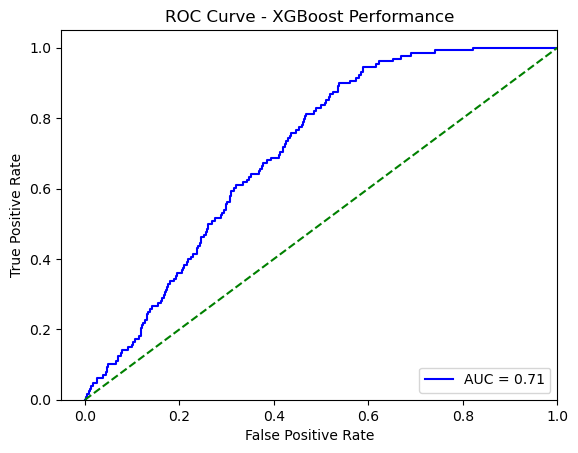

In [191]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the XGBoost classifier
boosted_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
boosted_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and generate probabilities
predicted_labels = boosted_clf.predict(X_test)
predicted_probs = boosted_clf.predict_proba(X_test)

# Display classification performance
print("Evaluation metrics for the XGBoost classifier:")
print(classification_report(y_test, predicted_labels))

print("Confusion matrix (actual vs predicted):")
print(confusion_matrix(y_test, predicted_labels))

# Visualize confusion matrix
matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('XGBoost: Confusion Matrix Heatmap')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy Score → {accuracy:.2f}")

precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

print(f"Precision → {precision:.2f}")
print(f"Recall → {recall:.2f}")
print(f"F1 Score → {f1:.2f}")

# Sensitivity, specificity, and AUC
sens_xgb, spec_xgb = get_sensitivity_specificity(y_test, predicted_labels)
fpr, tpr, _ = roc_curve(y_test, predicted_probs[:, 1])
auc_val = roc_auc_score(y_test, predicted_probs[:, 1])

print(f"Sensitivity → {sens_xgb:.2f}")
print(f"Specificity → {spec_xgb:.2f}")
print(f"AUC Score → {auc_val:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_val:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Performance')
plt.legend(loc='lower right')
plt.show()


## Performance Benchmark Across Models


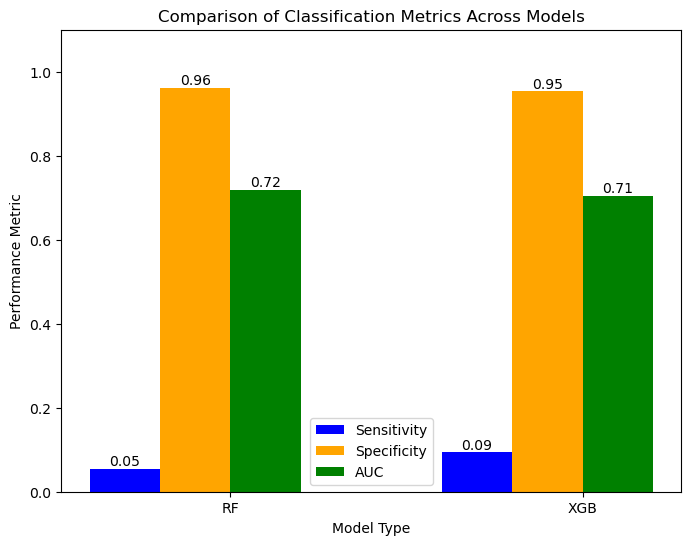

In [193]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
ml_names = ['RF', 'XGB']
sensitivities = [sensitivity_rf, sens_xgb]
specificities = [specificity_rf, spec_xgb]
auc_scores = [rf_auc, auc_val]

# Helper to annotate bars
def display_bar_labels(bars):
    for bar in bars:
        score = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, score, round(score, 2),
                 ha='center', va='bottom')

# Setup bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
x_positions = np.arange(len(ml_names))

# Draw grouped bars
bars_sens = ax.bar(x_positions, sensitivities, bar_width, label='Sensitivity', color='blue')
bars_spec = ax.bar(x_positions + bar_width, specificities, bar_width, label='Specificity', color='orange')
bars_auc = ax.bar(x_positions + 2 * bar_width, auc_scores, bar_width, label='AUC', color='green')

# Axis and appearance tweaks
ax.set_xlabel('Model Type')
ax.set_ylabel('Performance Metric')
ax.set_title('Comparison of Classification Metrics Across Models')
ax.set_xticks(x_positions + bar_width * 1.5)
ax.set_xticklabels(ml_names)
ax.set_ylim(0, 1.1)
ax.legend()

# Add score annotations
display_bar_labels(bars_sens)
display_bar_labels(bars_spec)
display_bar_labels(bars_auc)

plt.show()


### Tree-Based Feature Importance

Top features based on Random Forest importance:
age → 0.4130
avg_glucose_level → 0.2057
bmi → 0.1445
smoking_status → 0.0582
work_type → 0.0504
Residence_type → 0.0491
gender → 0.0330
ever_married → 0.0185
hypertension → 0.0176
heart_disease → 0.0100


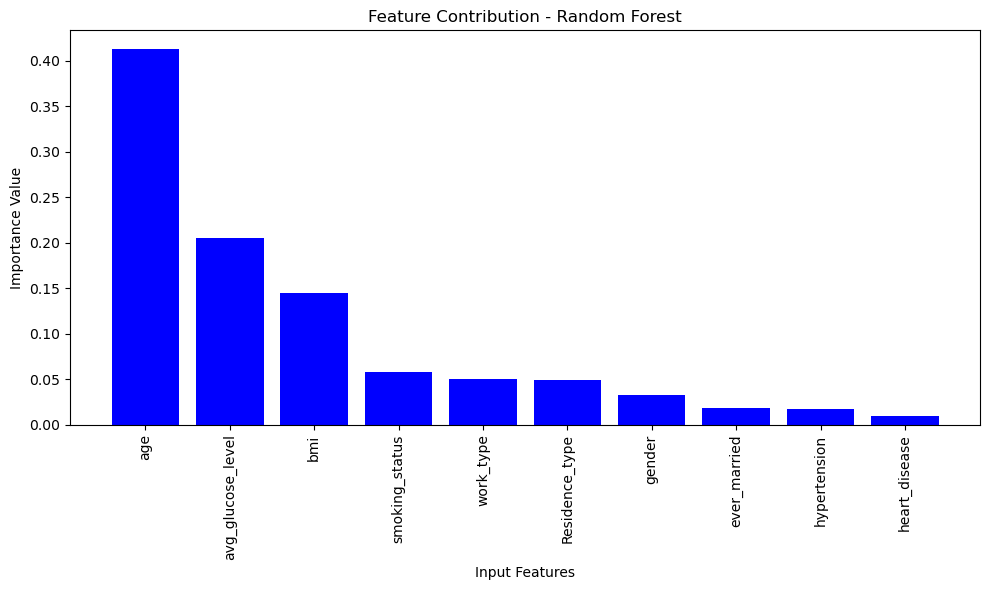

Top features based on XGBoost importance:
age → 0.1736
Residence_type → 0.1526
work_type → 0.1274
gender → 0.1221
heart_disease → 0.0895
ever_married → 0.0866
smoking_status → 0.0848
hypertension → 0.0729
avg_glucose_level → 0.0471
bmi → 0.0435


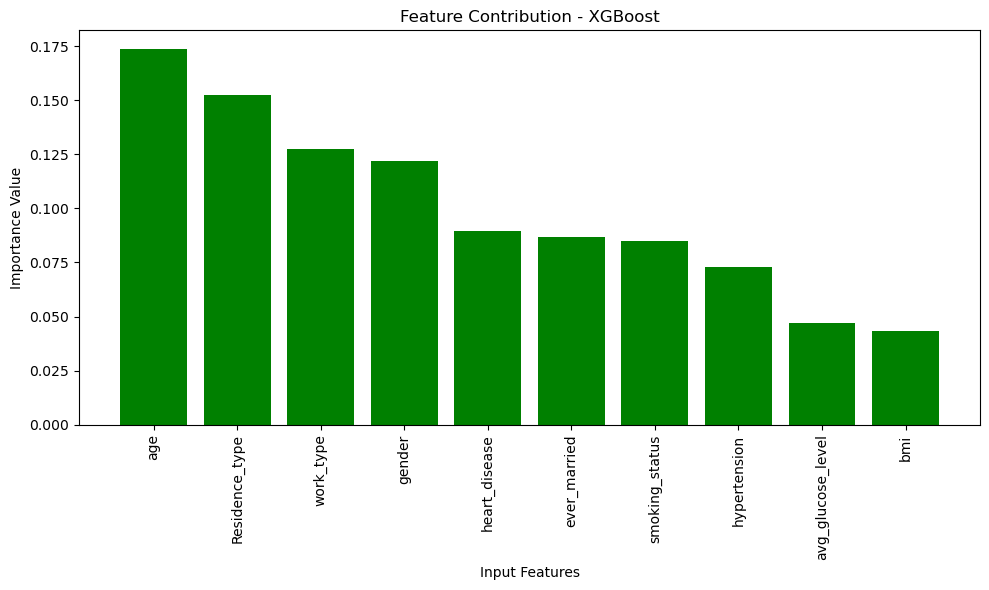

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve feature names from original dataset
feature_names = clean_data.drop('stroke', axis=1).columns

# Random Forest: Calculate and sort feature importances
rf_importances = random_forest.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)[::-1]

print("Top features based on Random Forest importance:")
for idx in rf_sorted_idx:
    print(f"{feature_names[idx]} → {rf_importances[idx]:.4f}")

# Visualize Random Forest feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_importances)), rf_importances[rf_sorted_idx], color='blue')
plt.xticks(range(len(rf_importances)), [feature_names[i] for i in rf_sorted_idx], rotation=90)
plt.title('Feature Contribution - Random Forest')
plt.xlabel('Input Features')
plt.ylabel('Importance Value')
plt.tight_layout()
plt.show()

# XGBoost: Calculate and sort feature importances
xgb_importances = boosted_clf.feature_importances_
xgb_sorted_idx = np.argsort(xgb_importances)[::-1]

print("Top features based on XGBoost importance:")
for idx in xgb_sorted_idx:
    print(f"{feature_names[idx]} → {xgb_importances[idx]:.4f}")

# Visualize XGBoost feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_importances)), xgb_importances[xgb_sorted_idx], color='green')
plt.xticks(range(len(xgb_importances)), [feature_names[i] for i in xgb_sorted_idx], rotation=90)
plt.title('Feature Contribution - XGBoost')
plt.xlabel('Input Features')
plt.ylabel('Importance Value')
plt.tight_layout()
plt.show()


### Permutation-Based Feature Importance

Permutation Importance (Random Forest - ROC AUC):
age → 0.2064 ± 0.0222
avg_glucose_level → 0.0214 ± 0.0069
bmi → 0.0037 ± 0.0106
gender → -0.0010 ± 0.0045
ever_married → -0.0028 ± 0.0045
heart_disease → -0.0051 ± 0.0032
Residence_type → -0.0074 ± 0.0088
hypertension → -0.0110 ± 0.0038
smoking_status → -0.0136 ± 0.0068
work_type → -0.0171 ± 0.0047


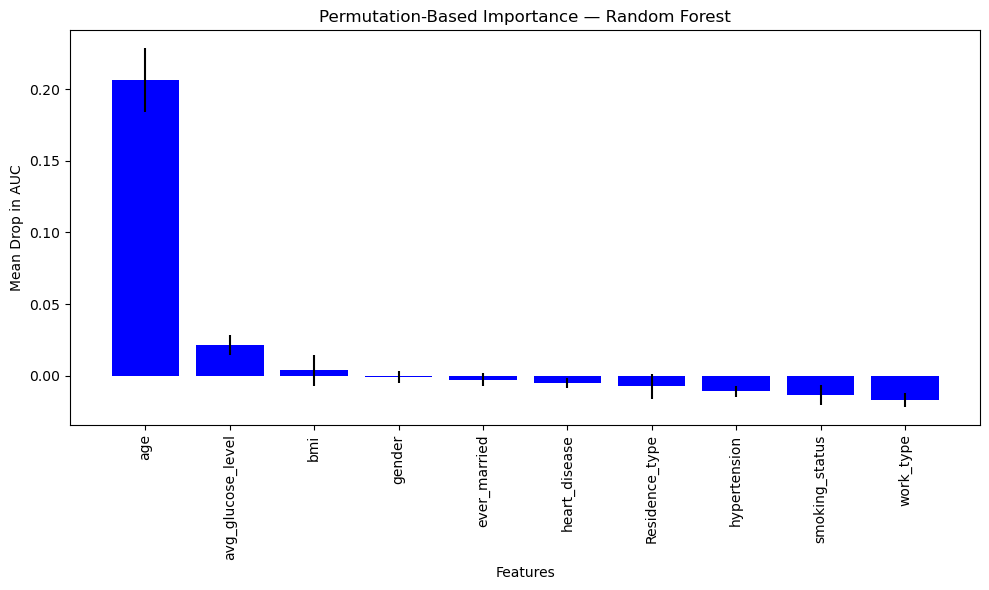

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Permutation Importance - Random Forest
rf_perm_result = permutation_importance(
    random_forest, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc'
)
rf_perm_order = np.argsort(rf_perm_result.importances_mean)[::-1]

print("Permutation Importance (Random Forest - ROC AUC):")
for idx in rf_perm_order:
    mean_score = rf_perm_result.importances_mean[idx]
    std_score = rf_perm_result.importances_std[idx]
    print(f"{feature_names[idx]} → {mean_score:.4f} ± {std_score:.4f}")

# Bar chart - RF permutation importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_perm_result.importances_mean)),
        rf_perm_result.importances_mean[rf_perm_order],
        yerr=rf_perm_result.importances_std[rf_perm_order],
        color='blue')
plt.xticks(range(len(rf_perm_result.importances_mean)),
           [feature_names[i] for i in rf_perm_order], rotation=90)
plt.title('Permutation-Based Importance — Random Forest')
plt.xlabel('Features')
plt.ylabel('Mean Drop in AUC')
plt.tight_layout()
plt.show()

# Permutation Importance - XGBoost
xgb_perm_result = permutation_importance(
    boosted_clf, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc'
)
xgb_perm_order = np.argsort(xgb_perm_result.importances_mean)[::-1]

print("Permutation Importance (XGBoost - ROC AUC):")
for idx in xgb_perm_order:
    mean_score = xgb_perm_result.importances_mean[idx]
    std_score = xgb_perm_result.importances_std[idx]
    print(f"{feature_names[idx]} → {mean_score:.4f} ± {std_score:.4f}")

# Bar chart - XGB permutation importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_perm_result.importances_mean)),
        xgb_perm_result.importances_mean[xgb_perm_order],
        yerr=xgb_perm_result.importances_std[xgb_perm_order],
        color='green')
plt.xticks(range(len(xgb_perm_result.importances_mean)),
           [feature_names[i] for i in xgb_perm_order], rotation=90)
plt.title('Permutation-Based Importance — XGBoost')
plt.xlabel('Features')
plt.ylabel('Mean Drop in AUC')
plt.tight_layout()
plt.show()


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# --- Random Forest Hyperparameter Tuning ---
# Define the parameter space
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Grid Search with cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and CV score
print("Top parameters for Random Forest →", rf_grid_search.best_params_)
print("Cross-validated AUC (Random Forest) →", rf_grid_search.best_score_)

# Evaluate optimized RF model on test set
rf_best = rf_grid_search.best_estimator_
rf_preds_proba = rf_best.predict_proba(X_test)[:, 1]
rf_test_auc = roc_auc_score(y_test, rf_preds_proba)
print("Final AUC on test set (Random Forest) →", rf_test_auc)

# --- XGBoost Hyperparameter Tuning ---
# Define the parameter space
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize the XGBoost classifier
boosted_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Grid Search with cross-validation
xgb_grid_search = GridSearchCV(
    estimator=boosted_clf,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and CV score
print("Top parameters for XGBoost →", xgb_grid_search.best_params_)
print("Cross-validated AUC (XGBoost) →", xgb_grid_search.best_score_)

# Evaluate optimized XGB model on test set
xgb_best = xgb_grid_search.best_estimator_
xgb_preds_proba = xgb_best.predict_proba(X_test)[:, 1]
xgb_test_auc = roc_auc_score(y_test, xgb_preds_proba)
print("Final AUC on test set (XGBoost) →", xgb_test_auc)


##Hypertuned Randomforest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define metric extraction function
def get_sensitivity_specificity(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Initialize and train hypertuned RF model
rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)

# Classification report
print("Random Forest Evaluation after Hyperparameter Tuning:")
print(classification_report(y_test, rf_preds))

# Confusion matrix summary
print("Random Forest: Confusion Matrix (Actual vs Predicted):")
print(confusion_matrix(y_test, rf_preds))

# Heatmap of confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Random Forest: Confusion Matrix Display')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Accuracy
acc_rf = accuracy_score(y_test, rf_preds)
print(f"Accuracy → {acc_rf:.2f}")

# Precision, Recall, F1
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print(f"Precision → {rf_precision:.2f}")
print(f"Recall → {rf_recall:.2f}")
print(f"F1 Score → {rf_f1:.2f}")

# Sensitivity, Specificity, AUC
sensitivity_rf, specificity_rf = get_sensitivity_specificity(y_test, rf_preds)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs[:, 1])
rf_auc = roc_auc_score(y_test, rf_probs[:, 1])

print(f"Sensitivity → {sensitivity_rf:.2f}")
print(f"Specificity → {specificity_rf:.2f}")
print(f"AUC Score → {rf_auc:.2f}")

# ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {rf_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


##Hypertuned XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define and train hypertuned XGBoost classifier
boosted_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.3,
    max_depth=9,
    n_estimators=300,
    subsample=0.8
)
boosted_clf.fit(X_train_resampled, y_train_resampled)

# Generate predictions and class probabilities
xgb_preds = boosted_clf.predict(X_test)
xgb_probs = boosted_clf.predict_proba(X_test)

# Output classification performance
print("XGBoost Test Results (Hypertuned):")
print(classification_report(y_test, xgb_preds))

print("Confusion Matrix Output (XGBoost):")
print(confusion_matrix(y_test, xgb_preds))

# Plot confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('XGBoost Confusion Matrix View')
plt.ylabel('Observed Class')
plt.xlabel('Predicted Class')
plt.show()

# Accuracy
acc_xgb = accuracy_score(y_test, xgb_preds)
print(f"Accuracy → {acc_xgb:.2f}")

# Precision, Recall, F1
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)

print(f"Precision → {xgb_precision:.2f}")
print(f"Recall → {xgb_recall:.2f}")
print(f"F1 Score → {xgb_f1:.2f}")

# Sensitivity, Specificity, AUC
sens_xgb, spec_xgb = get_sensitivity_specificity(y_test, xgb_preds)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs[:, 1])
auc_val = roc_auc_score(y_test, xgb_probs[:, 1])

print(f"Sensitivity → {sens_xgb:.2f}")
print(f"Specificity → {spec_xgb:.2f}")
print(f"AUC Score → {auc_val:.2f}")

# ROC curve plot
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'AUC = {auc_val:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Hypertuned XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()


## Performance Benchmark Across Hypertuned Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model labels
ml_names = ['RF', 'XGB']

# Performance metrics
sensitivity_scores = [sensitivity_rf, sens_xgb]
specificity_scores = [specificity_rf, spec_xgb]
auc_scores = [rf_auc, auc_val]

# Helper function to label each bar
def annotate_bars(bars):
    for bar in bars:
        score = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, score, f'{score:.2f}',
                 ha='center', va='bottom')

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
x_pos = np.arange(len(ml_names))

# Create the grouped bar plots
bars_sens = ax.bar(x_pos, sensitivity_scores, width=bar_width, label='Sensitivity', color='blue')
bars_spec = ax.bar(x_pos + bar_width, specificity_scores, width=bar_width, label='Specificity', color='orange')
bars_auc = ax.bar(x_pos + 2 * bar_width, auc_scores, width=bar_width, label='AUC', color='green')

# Configure axes and appearance
ax.set_xlabel('Model Type')
ax.set_ylabel('Performance Score')
ax.set_title('Model Evaluation Comparison After Hyperparameter Optimization')
ax.set_xticks(x_pos + bar_width * 1.5)
ax.set_xticklabels(ml_names)
ax.set_ylim(0, 1.1)
ax.legend()

# Add numeric value on top of each bar
annotate_bars(bars_sens)
annotate_bars(bars_spec)
annotate_bars(bars_auc)

plt.tight_layout()
plt.show()
